# Gradio Day!

Today we will build User Interfaces using the outrageously simple Gradio framework.

Prepare for joy!

Please note: your Gradio screens may appear in 'dark mode' or 'light mode' depending on your computer settings.

In [ ]:
# imports

import os
import requests
from bs4 import BeautifulSoup
from typing import List
from dotenv import load_dotenv
from openai import OpenAI
import google.generativeai
import anthropic

In [ ]:
# We import gradio into our file

In [ ]:
import gradio as gr # oh yeah!

In [ ]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
# google_api_key = os.getenv('GOOGLE_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set")

# if google_api_key:
#     print(f"Google API Key exists and begins {google_api_key[:8]}")
# else:
#     print("Google API Key not set")

In [ ]:
# Connect to OpenAI, Anthropic and Google; comment out the Claude or Google lines if you're not using them

openai = OpenAI()

# claude = anthropic.Anthropic()

# google.generativeai.configure()

In [ ]:
# A generic system message - no more snarky adversarial AIs!

system_message = "You are a helpful assistant"

In [ ]:
# Let's wrap a call to GPT-4o-mini in a simple function

def message_gpt(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
      ]
    completion = openai.chat.completions.create(
        model='gpt-4o-mini',
        messages=messages,
    )
    return completion.choices[0].message.content

In [ ]:
# This can reveal the "training cut off", or the most recent date in the training data

message_gpt("What is today's date?")

## User Interface time!

In [ ]:
# here's a simple function

def shout(text):
    print(f"Shout has been called with input {text}")
    return text.upper()

In [ ]:
shout("hello")

#### Now we will use Gradio to build a UI for this function.
#### Below is our interface. 
1. We have provided input type and the output type and there are multiple ways to provide other ui components as well.
2. Flag button is for flagging the response to check later, it is available by default but we can remove the flag if we do not want it.

In [ ]:
# The simplicty of gradio. This might appear in "light mode" - I'll show you how to make this in dark mode later.

gr.Interface(fn=shout, inputs="textbox", outputs="textbox").launch()

In [ ]:
# Adding share=True means that it can be accessed publically
# A more permanent hosting is available using a platform called Spaces from HuggingFace, which we will touch on next week
# NOTE: Some Anti-virus software and Corporate Firewalls might not like you using share=True. If you're at work on on a work network, I suggest skip this test.

gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never").launch(share=True)

#### Here we are disabling the flag button , also we did share=True , which means gradio was deploy this in a server and serve it on the internet
1. By doing this we can share this with other people working on the same model.
2. But our actual method is still running on our local machine and from the ui in public internet we are pointing to our local jupyter box code.

In [ ]:
# Adding inbrowser=True opens up a new browser window automatically

gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never").launch(inbrowser=True)

## Forcing dark mode

Gradio appears in light mode or dark mode depending on the settings of the browser and computer. There is a way to force gradio to appear in dark mode, but Gradio recommends against this as it should be a user preference (particularly for accessibility reasons). But if you wish to force dark mode for your screens, below is how to do it.

In [ ]:
# Define this variable and then pass js=force_dark_mode when creating the Interface

force_dark_mode = """
function refresh() {
    const url = new URL(window.location);
    if (url.searchParams.get('__theme') !== 'dark') {
        url.searchParams.set('__theme', 'dark');
        window.location.href = url.href;
    }
}
"""
gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never", js=force_dark_mode).launch()

In [ ]:
#### We can customize the UI as per our requirement like below are expanding the input and output textBoxes.

In [ ]:
# Inputs and Outputs

view = gr.Interface(
    fn=shout,
    inputs=[gr.Textbox(label="Your message:", lines=6)],
    outputs=[gr.Textbox(label="Response:", lines=8)],
    flagging_mode="never"
)
view.launch()

### In the below code we can see that we can degine the method seperately. The input fields passed as alist will be sent to the method as input parameter and the return value from the method defined here i.e. message_gpt will be displayedin the output box.
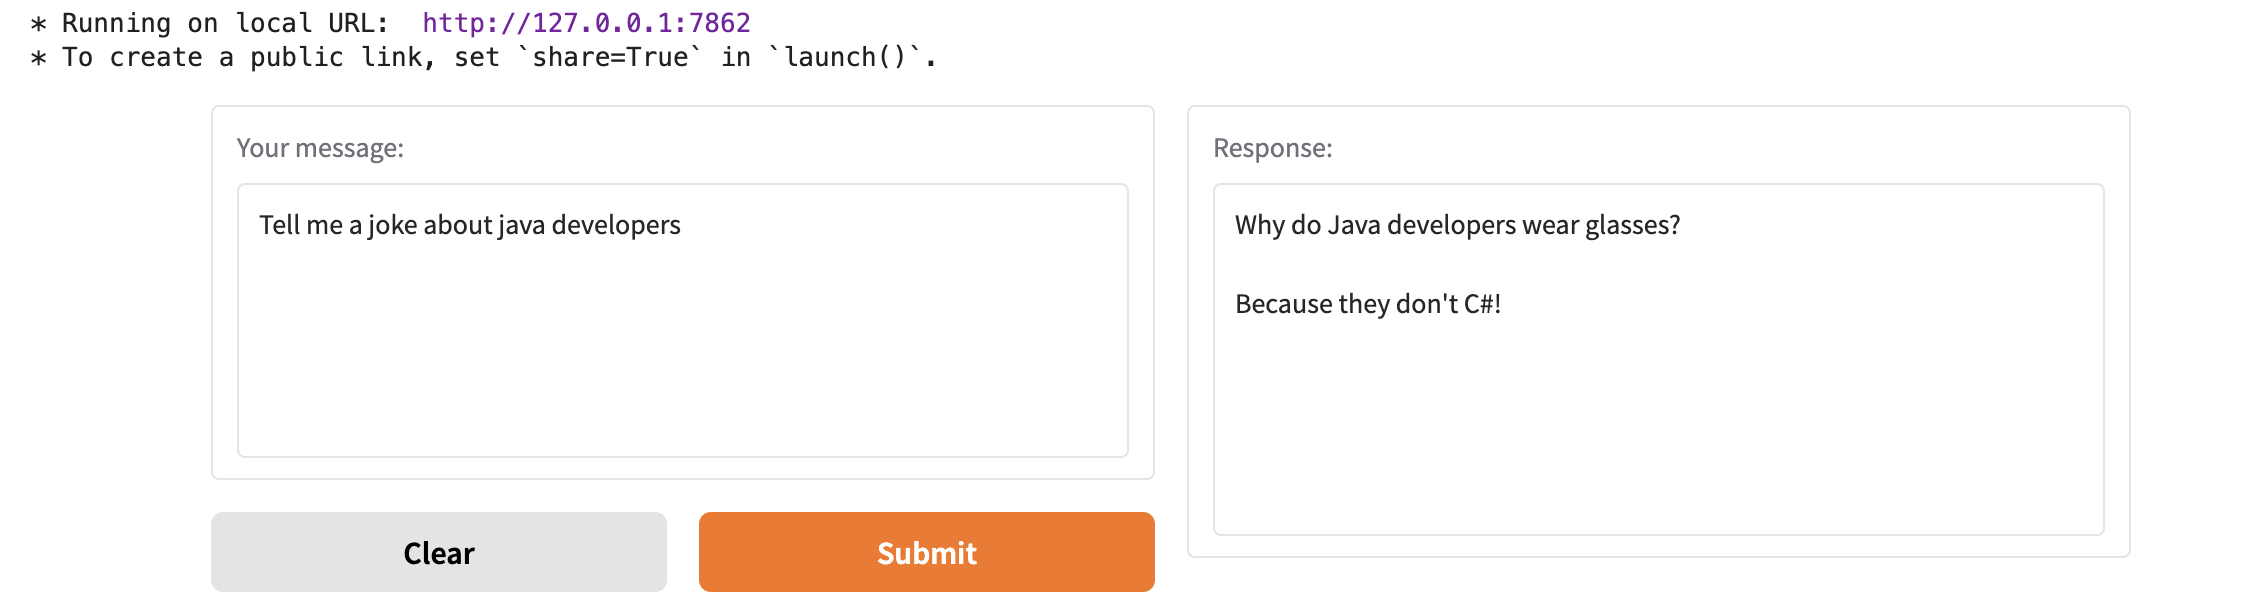

### Also as we can see we can widen or shorten the input and output box based on the our requirements by passing the parameter lines. 

In [ ]:
# And now - changing the function from "shout" to "message_gpt"

view = gr.Interface(
    fn=message_gpt,
    inputs=[gr.Textbox(label="Your message:", lines=6)],
    outputs=[gr.Textbox(label="Response:", lines=8)],
    flagging_mode="never"
)
view.launch()

In [ ]:
# Let's use Markdown
# Are you wondering why it makes any difference to set system_message when it's not referred to in the code below it?
# I'm taking advantage of system_message being a global variable, used back in the message_gpt function (go take a look)
# Not a great software engineering practice, but quite common during Jupyter Lab R&D!

system_message = "You are a helpful assistant that responds in markdown"

view = gr.Interface(
    fn=message_gpt,
    inputs=[gr.Textbox(label="Your message:")],
    outputs=[gr.Markdown(label="Response:")],
    flagging_mode="never"
)
view.launch()

In [ ]:
# Let's create a call that streams back results
# If you'd like a refresher on Generators (the "yield" keyword),
# Please take a look at the Intermediate Python notebook in week1 folder.

def stream_gpt(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
      ]
    stream = openai.chat.completions.create(
        model='gpt-4o-mini',
        messages=messages,
        stream=True
    )
    result = ""
    for chunk in stream:
        result += chunk.choices[0].delta.content or ""
        yield result

### Below function will stream the result in Markdown

In [ ]:
view = gr.Interface(
    fn=stream_gpt,
    inputs=[gr.Textbox(label="Your message:")],
    outputs=[gr.Markdown(label="Response:")],
    flagging_mode="never"
)
view.launch()

In [ ]:
def stream_claude(prompt):
    result = claude.messages.stream(
        model="claude-3-haiku-20240307",
        max_tokens=1000,
        temperature=0.7,
        system=system_message,
        messages=[
            {"role": "user", "content": prompt},
        ],
    )
    response = ""
    with result as stream:
        for text in stream.text_stream:
            response += text or ""
            yield response

In [ ]:
view = gr.Interface(
    fn=stream_claude,
    inputs=[gr.Textbox(label="Your message:")],
    outputs=[gr.Markdown(label="Response:")],
    flagging_mode="never"
)
view.launch()

## Minor improvement

I've made a small improvement to this code.

Previously, it had these lines:

```
for chunk in result:
  yield chunk
```

There's actually a more elegant way to achieve this (which Python people might call more 'Pythonic'):

`yield from result`

I cover this in more detail in the Intermediate Python notebook in the week1 folder - take a look if you'd like more.

## Choosing the Model we want to talk to with an UI

In [ ]:
def stream_model(prompt, model):
    if model=="GPT":
        result = stream_gpt(prompt)
    elif model=="Claude":
        result = stream_claude(prompt)
    else:
        raise ValueError("Unknown model")
    yield from result

### Now there are two inputs since there are two parameters that we pass to the stream_model method.

1. First input is our message in a Dropdown. This is basically our prompt that will be passed to the stream_model method.
2. Second input is the Dropdown that will have the options of choosing GPT or claude and based on that the model value will be passed to the    stream_model function.

In [ ]:
view = gr.Interface(
    fn=stream_model,
    inputs=[gr.Textbox(label="Your message:"), gr.Dropdown(["GPT", "Claude"], label="Select model", value="GPT")],
    outputs=[gr.Markdown(label="Response:")],
    flagging_mode="never"
)
view.launch()

# Building a company brochure generator

Now you know how - it's simple!

<table style="margin: 0; text-align: left;">
    <tr>
        <td style="width: 150px; height: 150px; vertical-align: middle;">
            <img src="../important.jpg" width="150" height="150" style="display: block;" />
        </td>
        <td>
            <h2 style="color:#900;">Before you read the next few cells</h2>
            <span style="color:#900;">
                Try to do this yourself - go back to the company brochure in week1, day5 and add a Gradio UI to the end. Then come and look at the solution.
            </span>
        </td>
    </tr>
</table>

In [ ]:
# A class to represent a Webpage

class Website:
    url: str
    title: str
    text: str

    def __init__(self, url):
        self.url = url
        response = requests.get(url)
        self.body = response.content
        soup = BeautifulSoup(self.body, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

    def get_contents(self):
        return f"Webpage Title:\n{self.title}\nWebpage Contents:\n{self.text}\n\n"

In [ ]:
# With massive thanks to Bill G. who noticed that a prior version of this had a bug! Now fixed.

system_message = "You are an assistant that analyzes the contents of a company website landing page \
and creates a short brochure about the company for prospective customers, investors and recruits. Respond in markdown."

In [ ]:
# Let's create a call that streams back results
# If you'd like a refresher on Generators (the "yield" keyword),
# Please take a look at the Intermediate Python notebook in week1 folder.

def stream_gpt(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
      ]
    stream = openai.chat.completions.create(
        model='gpt-4o-mini',
        messages=messages,
        stream=True
    )
    result = ""
    for chunk in stream:
        result += chunk.choices[0].delta.content or ""
        yield result

In [ ]:
# For the second model we will choose llama3.2 , we can also choose claude and that code is already present.
# Here we are using the openai API call to connect to claude so even the streaming structure will be same
def stream_llama(prompt):
    # System Prompt is already defined above and will be same for both gpt and llama
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
      ]

    ollama_via_openai = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')

    stream = ollama_via_openai.chat.completions.create(
        model="llama3.2",
        messages=messages,
        stream=True
    )

    result = ""
    for chunk in stream:
        result += chunk.choices[0].delta.content or ""
        yield result

In [ ]:
def stream_brochure(company_name, url, model):
    prompt = f"Please generate a company brochure for {company_name}. Here is their landing page:\n"
    prompt += Website(url).get_contents()
    if model=="GPT":
        result = stream_gpt(prompt)
    elif model=="llama":
        result = stream_llama(prompt)
    else: 
        raise ValueError("Unknown model")
    yield from result

In [ ]:
view = gr.Interface(
    fn=stream_brochure,
    inputs=[
        gr.Textbox(label="Company name:"),
        gr.Textbox(label="Landing page URL including http:// or https://"),
        gr.Dropdown(["GPT", "llama"], label="Select model")],
    outputs=[gr.Markdown(label="Brochure:")],
    flagging_mode="never"
)
view.launch()